## Домашнее творческое задание по дисциплине "Технологии обработки больших данных"

Выполнил: студент группы __ПМ20-4 Савостьянов Александр Васильевич__

Вариант: __91__

    

#### Импортируем нужные библиотеки 

In [276]:
import re
import json
import nltk
import xlsxwriter
from re import sub
import numpy as np
import pandas as pd
import xlwings as xw
import seaborn as sns
from decimal import Decimal
from collections import Counter
import matplotlib.pyplot as plt
from xlsxwriter.utility import xl_col_to_name

__Задание 1__. В файле `steam_games.json` находится информация об играх из магазина Steam. При помощи пакета `json` считайте файл. Выведите на экран количество игр жанра RPG, самым популярным языком которых является русский. "Язык является самым популярным" означает, что ранг этого языка в списке языков равен 0.

In [277]:
with open(
    "steam_games.json",
    "r",
    encoding="utf-8"
) as fp:
    game_notes = json.load(fp)
game_notes

[{'url': 'https://store.steampowered.com/app/959410/The_Endless_Empty/',
  'types': 'app',
  'name': 'The Endless Empty',
  'desc_snippet': 'A surreal post-life adventure',
  'release_date': 'Nov 3, 2018',
  'developer': 'Erik Sheader-Smith',
  'publisher': 'Erik Sheader-Smith,Erik Sheader-Smith',
  'popular_tags': ['Adventure',
   'RPG',
   'Indie',
   'RPGMaker',
   'Story Rich',
   'Surreal'],
  'game_details': ['Single-player',
   'Profile Features Limited\xa0\r\n\t\t\t\t\t\t\t\t\t'],
  'languages': [{'lang': 'English', 'rank': 0}],
  'achievements': 5.0,
  'game_description': " About This Game  All sales of this game will be donated to the Trevor Project. - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - A surreal post-life adventure. It only took a few moments for the feeling of panic to set in. “What if I lived my life wrong? How would I be judged? What if there is nothing after this? The story begins with an individual, recently decease

In [278]:
lst_of_games = []
for note in game_notes:
    if 'RPG' in note["genres"]:
        for l in note["languages"]:
            if 'Russian' in l["lang"] and 0 == l["rank"]:
                lst_of_games.append(note["name"])
                
print("Количество игр жанра RPG, самым популярным языком которых является русский: ", len(lst_of_games))

Количество игр жанра RPG, самым популярным языком которых является русский:  79


__Задание 2__. Преобразуйте данные из файла, предложенного в задании 1, в `pd.DataFrame` и свяжите его с переменной `games_df`. Удалите столбцы, содержащие более 65% пропусков. Удалите строки, содержащие пропуски в столбце `developer`. Используя механизм `groupby`, для каждой игры добавьте столбец `n_games_of_dev`, содержащий количество игр, которые выпустил ее разработчик.

In [279]:
games_df = pd.DataFrame.from_dict(game_notes)
games_df

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,minimum_requirements,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows Xp / Vista / 7,Processor:...","Recommended:,OS:,Windows Xp / Vista / 7,Proces...",$3.99,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,1189.0
1,https://store.steampowered.com/app/664830/Zomb...,app,Zombotron,"Fight to survive on a mysterious alien planet,...","Apr 22, 2019",Ant.Karlov,"Armor Games Studios,Armor Games Studios","[Action, Adventure, Indie, 2D, Zombies, Single...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...",...,"Minimum:,OS:,Windows 7,Processor:,1.8 GHz,Memo...","Recommended:,OS:,Windows 10,Processor:,2.3 Ghz...",$14.99,NaN,very negative,5115,"[Action, Adventure, Indie]",94,49,100.0
2,https://store.steampowered.com/app/418180/Temp...,app,Tempest: Pirate Action RPG,Tempest is a Pirate Open World Action RPG wher...,"Aug 22, 2016",Lion's Shade,"HeroCraft,HeroCraft","[Pirates, Naval, Action, Open World, RPG, Sing...","[Single-player, Multi-player, Co-op, Steam Ach...","[{'lang': 'Japanese', 'rank': 0}, {'lang': 'Ge...",...,NaN,NaN,$14.99,$80.17,negative,1266,"[Action, Indie, RPG]",58,98,100.0
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,NaN,"Jun 3, 2016","SmiteWorks USA, LLC",NaN,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows XP, Vista, 7x , 8x or 10x...","Recommended:,OS:,Windows XP, Vista, 7x , 8x or...",$9.99,NaN,very positive,12492,"[Indie, RPG, Strategy]",51,87,559.0
4,https://store.steampowered.com/bundle/5044/WRC...,bundle,WRC Collection,WRC Collection bundle,NaN,KT Racing,Bigben Interactive,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",...,NaN,NaN,NaN,$120.71,neutral,8573,[Racing],80,27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://store.steampowered.com/bundle/8017/Ove...,bundle,Overcooked! 1 & 2 Bundle,Overcooked! 1 & 2 Bundle bundle,NaN,Ghost Town Games Ltd.,Team17 Digital Ltd,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' German', 'rank': 0}, {'lang': ' Fr...",...,NaN,NaN,$41.98,$32.16,negative,4310,"[Action, Casual, Indie, Simulation]",1,50,100.0
9996,https://store.steampowered.com/app/326027/TS_M...,app,TS Marketplace: GWR 40t Coal Wagon Pack,NaN,"Feb 8, 2016",Skyhook Games,"Dovetail Games,Dovetail Games",[Simulation],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows® Vista / 7 / 8,Processor:...","Recommended:,Graphics:,Laptop versions of thes...",$4.99,NaN,very negative,9512,[Simulation],22,90,1088.0
9997,https://store.steampowered.com/app/933550/WARR...,app,WARRIORS OROCHI 4/無双OROCHI３ - Legendary Weapon...,NaN,"Nov 1, 2018","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...",[Action],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': 'Korean', 'rank': 0}, {'lang': 'Engl...",...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$0.99,$14.72,very positive,16437,[Action],7,0,1454.0
9998,https://store.steampowered.com/app/884400/The_...,app,The Harbinger's Head,Visit a myth-infested 1820s Ireland. One dark ...,"Jul 19, 2018",Hosted Games,"Hosted Games,Hosted Games","[Adventure, Indie, RPG, Choose Your Own Advent...",

In [280]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return mis_val_table_ren_columns

In [281]:
missing_values_table(games_df)

,Missing Values,% of Total Values
mature_content,9297,93.0
achievements,6930,69.3
discount_price,6332,63.3
minimum_requirements,4878,48.8
recommended_requirements,4878,48.8
desc_snippet,3231,32.3
original_price,1986,19.9
selled,1986,19.9
publisher,1191,11.9
release_date,794,7.9


Столбец "missing_values_table" и "achievements" содержат более 65% пропусков => мы их можем удалить

In [282]:
games_df = games_df.drop(columns=['mature_content', 'achievements'])
games_df

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,minimum_requirements,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows Xp / Vista / 7,Processor:...","Recommended:,OS:,Windows Xp / Vista / 7,Proces...",$3.99,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,1189.0
1,https://store.steampowered.com/app/664830/Zomb...,app,Zombotron,"Fight to survive on a mysterious alien planet,...","Apr 22, 2019",Ant.Karlov,"Armor Games Studios,Armor Games Studios","[Action, Adventure, Indie, 2D, Zombies, Single...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...",...,"Minimum:,OS:,Windows 7,Processor:,1.8 GHz,Memo...","Recommended:,OS:,Windows 10,Processor:,2.3 Ghz...",$14.99,NaN,very negative,5115,"[Action, Adventure, Indie]",94,49,100.0
2,https://store.steampowered.com/app/418180/Temp...,app,Tempest: Pirate Action RPG,Tempest is a Pirate Open World Action RPG wher...,"Aug 22, 2016",Lion's Shade,"HeroCraft,HeroCraft","[Pirates, Naval, Action, Open World, RPG, Sing...","[Single-player, Multi-player, Co-op, Steam Ach...","[{'lang': 'Japanese', 'rank': 0}, {'lang': 'Ge...",...,NaN,NaN,$14.99,$80.17,negative,1266,"[Action, Indie, RPG]",58,98,100.0
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,NaN,"Jun 3, 2016","SmiteWorks USA, LLC",NaN,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows XP, Vista, 7x , 8x or 10x...","Recommended:,OS:,Windows XP, Vista, 7x , 8x or...",$9.99,NaN,very positive,12492,"[Indie, RPG, Strategy]",51,87,559.0
4,https://store.steampowered.com/bundle/5044/WRC...,bundle,WRC Collection,WRC Collection bundle,NaN,KT Racing,Bigben Interactive,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",...,NaN,NaN,NaN,$120.71,neutral,8573,[Racing],80,27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://store.steampowered.com/bundle/8017/Ove...,bundle,Overcooked! 1 & 2 Bundle,Overcooked! 1 & 2 Bundle bundle,NaN,Ghost Town Games Ltd.,Team17 Digital Ltd,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' German', 'rank': 0}, {'lang': ' Fr...",...,NaN,NaN,$41.98,$32.16,negative,4310,"[Action, Casual, Indie, Simulation]",1,50,100.0
9996,https://store.steampowered.com/app/326027/TS_M...,app,TS Marketplace: GWR 40t Coal Wagon Pack,NaN,"Feb 8, 2016",Skyhook Games,"Dovetail Games,Dovetail Games",[Simulation],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows® Vista / 7 / 8,Processor:...","Recommended:,Graphics:,Laptop versions of thes...",$4.99,NaN,very negative,9512,[Simulation],22,90,1088.0
9997,https://store.steampowered.com/app/933550/WARR...,app,WARRIORS OROCHI 4/無双OROCHI３ - Legendary Weapon...,NaN,"Nov 1, 2018","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...",[Action],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': 'Korean', 'rank': 0}, {'lang': 'Engl...",...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$0.99,$14.72,very positive,16437,[Action],7,0,1454.0
9998,https://store.steampowered.com/app/884400/The_...,app,The Harbinger's Head,Visit a myth-infested 1820s Ireland. One dark ...,"Jul 19, 2018",Hosted Games,"Hosted Games,Hosted Games","[Adventure, Indie, RPG, Choose Your Own Advent...",

In [283]:
rows_to_drop = games_df.loc[pd.isna(games_df["developer"]), :].index
rows_to_drop

Int64Index([  47,  192,  301,  753,  767,  829,  861, 1019, 1096, 1188, 1200,
            1265, 1362, 1374, 2068, 2465, 2487, 2546, 2693, 2780, 2788, 3130,
            3475, 3532, 3687, 4046, 4204, 4236, 4423, 4630, 4696, 4773, 4832,
            5698, 5830, 5860, 5869, 6072, 6136, 6137, 6223, 6438, 6901, 7026,
            7177, 7304, 7311, 7366, 7368, 7395, 7429, 7442, 7627, 7629, 7654,
            7967, 8066, 8073, 8214, 8267, 8309, 8465, 8494, 8559, 8753, 8864,
            8884, 8952, 9186, 9203, 9227, 9350, 9354, 9655, 9821, 9843],
           dtype='int64')

In [284]:
games_df.drop(index=rows_to_drop, inplace = True)
games_df

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,minimum_requirements,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows Xp / Vista / 7,Processor:...","Recommended:,OS:,Windows Xp / Vista / 7,Proces...",$3.99,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,1189.0
1,https://store.steampowered.com/app/664830/Zomb...,app,Zombotron,"Fight to survive on a mysterious alien planet,...","Apr 22, 2019",Ant.Karlov,"Armor Games Studios,Armor Games Studios","[Action, Adventure, Indie, 2D, Zombies, Single...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...",...,"Minimum:,OS:,Windows 7,Processor:,1.8 GHz,Memo...","Recommended:,OS:,Windows 10,Processor:,2.3 Ghz...",$14.99,NaN,very negative,5115,"[Action, Adventure, Indie]",94,49,100.0
2,https://store.steampowered.com/app/418180/Temp...,app,Tempest: Pirate Action RPG,Tempest is a Pirate Open World Action RPG wher...,"Aug 22, 2016",Lion's Shade,"HeroCraft,HeroCraft","[Pirates, Naval, Action, Open World, RPG, Sing...","[Single-player, Multi-player, Co-op, Steam Ach...","[{'lang': 'Japanese', 'rank': 0}, {'lang': 'Ge...",...,NaN,NaN,$14.99,$80.17,negative,1266,"[Action, Indie, RPG]",58,98,100.0
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,NaN,"Jun 3, 2016","SmiteWorks USA, LLC",NaN,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows XP, Vista, 7x , 8x or 10x...","Recommended:,OS:,Windows XP, Vista, 7x , 8x or...",$9.99,NaN,very positive,12492,"[Indie, RPG, Strategy]",51,87,559.0
4,https://store.steampowered.com/bundle/5044/WRC...,bundle,WRC Collection,WRC Collection bundle,NaN,KT Racing,Bigben Interactive,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",...,NaN,NaN,NaN,$120.71,neutral,8573,[Racing],80,27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://store.steampowered.com/bundle/8017/Ove...,bundle,Overcooked! 1 & 2 Bundle,Overcooked! 1 & 2 Bundle bundle,NaN,Ghost Town Games Ltd.,Team17 Digital Ltd,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' German', 'rank': 0}, {'lang': ' Fr...",...,NaN,NaN,$41.98,$32.16,negative,4310,"[Action, Casual, Indie, Simulation]",1,50,100.0
9996,https://store.steampowered.com/app/326027/TS_M...,app,TS Marketplace: GWR 40t Coal Wagon Pack,NaN,"Feb 8, 2016",Skyhook Games,"Dovetail Games,Dovetail Games",[Simulation],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'English', 'rank': 0}]",...,"Minimum:,OS:,Windows® Vista / 7 / 8,Processor:...","Recommended:,Graphics:,Laptop versions of thes...",$4.99,NaN,very negative,9512,[Simulation],22,90,1088.0
9997,https://store.steampowered.com/app/933550/WARR...,app,WARRIORS OROCHI 4/無双OROCHI３ - Legendary Weapon...,NaN,"Nov 1, 2018","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...",[Action],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': 'Korean', 'rank': 0}, {'lang': 'Engl...",...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$0.99,$14.72,very positive,16437,[Action],7,0,1454.0
9998,https://store.steampowered.com/app/884400/The_...,app,The Harbinger's Head,Visit a myth-infested 1820s Ireland. One dark ...,"Jul 19, 2018",Hosted Games,"Hosted Games,Hosted Games","[Adventure, Indie, RPG, Choose Your Own Advent...",

In [285]:
games_df['n_games_of_dev'] = games_df['name'].groupby(games_df['developer']).transform('count')
games_df

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled,n_games_of_dev
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows Xp / Vista / 7,Proces...",$3.99,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,1189.0,1
1,https://store.steampowered.com/app/664830/Zomb...,app,Zombotron,"Fight to survive on a mysterious alien planet,...","Apr 22, 2019",Ant.Karlov,"Armor Games Studios,Armor Games Studios","[Action, Adventure, Indie, 2D, Zombies, Single...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...",...,"Recommended:,OS:,Windows 10,Processor:,2.3 Ghz...",$14.99,NaN,very negative,5115,"[Action, Adventure, Indie]",94,49,100.0,1
2,https://store.steampowered.com/app/418180/Temp...,app,Tempest: Pirate Action RPG,Tempest is a Pirate Open World Action RPG wher...,"Aug 22, 2016",Lion's Shade,"HeroCraft,HeroCraft","[Pirates, Naval, Action, Open World, RPG, Sing...","[Single-player, Multi-player, Co-op, Steam Ach...","[{'lang': 'Japanese', 'rank': 0}, {'lang': 'Ge...",...,NaN,$14.99,$80.17,negative,1266,"[Action, Indie, RPG]",58,98,100.0,1
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,NaN,"Jun 3, 2016","SmiteWorks USA, LLC",NaN,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows XP, Vista, 7x , 8x or...",$9.99,NaN,very positive,12492,"[Indie, RPG, Strategy]",51,87,559.0,191
4,https://store.steampowered.com/bundle/5044/WRC...,bundle,WRC Collection,WRC Collection bundle,NaN,KT Racing,Bigben Interactive,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",...,NaN,NaN,$120.71,neutral,8573,[Racing],80,27,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://store.steampowered.com/bundle/8017/Ove...,bundle,Overcooked! 1 & 2 Bundle,Overcooked! 1 & 2 Bundle bundle,NaN,Ghost Town Games Ltd.,Team17 Digital Ltd,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' German', 'rank': 0}, {'lang': ' Fr...",...,NaN,$41.98,$32.16,negative,4310,"[Action, Casual, Indie, Simulation]",1,50,100.0,2
9996,https://store.steampowered.com/app/326027/TS_M...,app,TS Marketplace: GWR 40t Coal Wagon Pack,NaN,"Feb 8, 2016",Skyhook Games,"Dovetail Games,Dovetail Games",[Simulation],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,Graphics:,Laptop versions of thes...",$4.99,NaN,very negative,9512,[Simulation],22,90,1088.0,6
9997,https://store.steampowered.com/app/933550/WARR...,app,WARRIORS OROCHI 4/無双OROCHI３ - Legendary Weapon...,NaN,"Nov 1, 2018","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...",[Action],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': 'Korean', 'rank': 0}, {'lang': 'Engl...",...,"Recommended:,Requires a 64-bit processor and o...",$0.99,$14.72,very positive,16437,[Action],7,0,1454.0,126
9998,https://store.steampowered.com/app/884400/The_...,app,The Harbinger's Head,Visit a myth-infested 1820s Ireland. One dark ...,"Jul 19, 2018",Hosted Games,"Hosted Games,Hosted Games","[Adventure, Indie, RPG, Choose Your Own Advent...","[Single-player, Captions available, Steam Clou...","[{'lang': 'English', 'rank': 0}]",...,NaN,$2.99,$150.02,very negative,1577,"[Adventure, Indie, RPG]",68,22,1257.0,11


__Задание 3__. Выберите из таблицы `games_df` столбцы `avg_rating_users` и `avg_rating_critics`. Преобразуйте полученный набор данных в массив `numpy`. Найдите максимум $$max_{i,j\in I}{(u_i+c_j)}$$ где $u_i$ - значение столбца `avg_rating_users` для $i$-й строчки; $c_j$ - значение столбца `avg_rating_critics` для $j$-й строчки; $I$ - множество номеров строк.

In [286]:
user_and_critic_rating = games_df[["avg_rating_users", "avg_rating_critics"]].to_numpy()
user_and_critic_rating

array([[77, 63],
       [94, 49],
       [58, 98],
       ...,
       [ 7,  0],
       [68, 22],
       [ 1, 32]], dtype=int64)

In [287]:
print("Максимум: ", max(np.sum(user_and_critic_rating,axis=1).tolist()))

Максимум:  197


__Задание 4__. Преобразуйте столбец `original_price` в числовой. Удалите строки, в которых значение в данном столбце больше, чем величина 3 квартиля столбца. Проведите [min-max нормализацию](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization) столбцов `original_price` и `selled`. Постройте диаграмму рассеяния на основе двух этих столбцов. Сделайте цвет точек черным, размер точек - 5. Добавьте подписи осей (вертикальной и горизонтальной) и заголовок рисунка. Проведите прямую линию от точки (0, 1) до (1, 0). Сделайте эту линию красной и пунктирной.

In [288]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9924 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       9924 non-null   object 
 1   types                     9924 non-null   object 
 2   name                      9924 non-null   object 
 3   desc_snippet              6717 non-null   object 
 4   release_date              9146 non-null   object 
 5   developer                 9924 non-null   object 
 6   publisher                 8790 non-null   object 
 7   popular_tags              9924 non-null   object 
 8   game_details              9924 non-null   object 
 9   languages                 9924 non-null   object 
 10  game_description          9213 non-null   object 
 11  minimum_requirements      5084 non-null   object 
 12  recommended_requirements  5084 non-null   object 
 13  original_price            7962 non-null   object 
 14  discount

In [289]:
games_df["original_price"] = pd.to_numeric(games_df["original_price"].str.replace('$', ''), errors='coerce')
games_df

<ipython-input-289-7156701e3d4e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  games_df["original_price"] = pd.to_numeric(games_df["original_price"].str.replace('$', ''), errors='coerce')


,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled,n_games_of_dev
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows Xp / Vista / 7,Proces...",3.99,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,1189.0,1
1,https://store.steampowered.com/app/664830/Zomb...,app,Zombotron,"Fight to survive on a mysterious alien planet,...","Apr 22, 2019",Ant.Karlov,"Armor Games Studios,Armor Games Studios","[Action, Adventure, Indie, 2D, Zombies, Single...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}, {'lang': 'Ger...",...,"Recommended:,OS:,Windows 10,Processor:,2.3 Ghz...",14.99,NaN,very negative,5115,"[Action, Adventure, Indie]",94,49,100.0,1
2,https://store.steampowered.com/app/418180/Temp...,app,Tempest: Pirate Action RPG,Tempest is a Pirate Open World Action RPG wher...,"Aug 22, 2016",Lion's Shade,"HeroCraft,HeroCraft","[Pirates, Naval, Action, Open World, RPG, Sing...","[Single-player, Multi-player, Co-op, Steam Ach...","[{'lang': 'Japanese', 'rank': 0}, {'lang': 'Ge...",...,NaN,14.99,$80.17,negative,1266,"[Action, Indie, RPG]",58,98,100.0,1
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,NaN,"Jun 3, 2016","SmiteWorks USA, LLC",NaN,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows XP, Vista, 7x , 8x or...",9.99,NaN,very positive,12492,"[Indie, RPG, Strategy]",51,87,559.0,191
4,https://store.steampowered.com/bundle/5044/WRC...,bundle,WRC Collection,WRC Collection bundle,NaN,KT Racing,Bigben Interactive,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",...,NaN,NaN,$120.71,neutral,8573,[Racing],80,27,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://store.steampowered.com/bundle/8017/Ove...,bundle,Overcooked! 1 & 2 Bundle,Overcooked! 1 & 2 Bundle bundle,NaN,Ghost Town Games Ltd.,Team17 Digital Ltd,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' German', 'rank': 0}, {'lang': ' Fr...",...,NaN,41.98,$32.16,negative,4310,"[Action, Casual, Indie, Simulation]",1,50,100.0,2
9996,https://store.steampowered.com/app/326027/TS_M...,app,TS Marketplace: GWR 40t Coal Wagon Pack,NaN,"Feb 8, 2016",Skyhook Games,"Dovetail Games,Dovetail Games",[Simulation],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,Graphics:,Laptop versions of thes...",4.99,NaN,very negative,9512,[Simulation],22,90,1088.0,6
9997,https://store.steampowered.com/app/933550/WARR...,app,WARRIORS OROCHI 4/無双OROCHI３ - Legendary Weapon...,NaN,"Nov 1, 2018","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...",[Action],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': 'Korean', 'rank': 0}, {'lang': 'Engl...",...,"Recommended:,Requires a 64-bit processor and o...",0.99,$14.72,very positive,16437,[Action],7,0,1454.0,126
9998,https://store.steampowered.com/app/884400/The_...,app,The Harbinger's Head,Visit a myth-infested 1820s Ireland. One dark ...,"Jul 19, 2018",Hosted Games,"Hosted Games,Hosted Games","[Adventure, Indie, RPG, Choose Your Own Advent...","[Single-player, Captions available, Steam Clou...","[{'lang': 'English', 'rank': 0}]",...,NaN,2.99,$150.02,very negative,1577,"[Adventure, Indie, RPG]",68,22,1257.0,11


In [290]:
q_3 = games_df["original_price"].quantile(0.75)
q_3

12.99

In [291]:
rows_to_drop2 = games_df.loc[games_df["original_price"] > q_3].index
rows_to_drop2

Int64Index([   1,    2,    6,    8,    9,   12,   21,   23,   28,   34,
            ...
            9954, 9964, 9966, 9967, 9969, 9977, 9983, 9993, 9994, 9995],
           dtype='int64', length=1945)

In [292]:
games_df.drop(index=rows_to_drop2, inplace = True)
games_df

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled,n_games_of_dev
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows Xp / Vista / 7,Proces...",3.99,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,1189.0,1
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,NaN,"Jun 3, 2016","SmiteWorks USA, LLC",NaN,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows XP, Vista, 7x , 8x or...",9.99,NaN,very positive,12492,"[Indie, RPG, Strategy]",51,87,559.0,191
4,https://store.steampowered.com/bundle/5044/WRC...,bundle,WRC Collection,WRC Collection bundle,NaN,KT Racing,Bigben Interactive,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",...,NaN,NaN,$120.71,neutral,8573,[Racing],80,27,NaN,6
5,https://store.steampowered.com/app/946980/Awak...,app,Awakening of Dragon,Awakening of Dragon是一款龙题材、西方魔幻ARPG+MMO手游，游戏的一切...,"Sep 20, 2018",Double G,"Double G,Double G",[RPG],"[Online Multi-Player, Profile Features Limited...","[{'lang': 'Simplified Chinese', 'rank': 0}, {'...",...,NaN,NaN,NaN,very negative,12619,[RPG],23,92,NaN,1
7,https://store.steampowered.com/app/341780/Chro...,app,Chronicles of a Dark Lord: Episode II War of T...,Experience the 30+ hour long continuation of t...,"Jan 16, 2015",Kisareth Studios,"Kisareth Studios,Kisareth Studios","[RPG, Indie, RPGMaker, Turn-Based, Villain Pro...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}]",...,NaN,1.99,$5.21,positive,11983,"[Indie, RPG]",29,46,1380.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,https://store.steampowered.com/app/634012/Awes...,app,Awesomenauts - Commander Cook-It Skin,NaN,"Aug 16, 2017",Ronimo Games,NaN,"[Strategy, Action, Indie, Free to Play]","[Single-player, Multi-player, Co-op, Shared/Sp...","[{'lang': 'German', 'rank': 0}, {'lang': 'Dutc...",...,"Recommended:,OS:,Windows 7, Windows 8, or Wind...",4.99,$1.99,very positive,8429,"[Action, Free to Play, Indie, Strategy]",51,37,1091.0,24
9996,https://store.steampowered.com/app/326027/TS_M...,app,TS Marketplace: GWR 40t Coal Wagon Pack,NaN,"Feb 8, 2016",Skyhook Games,"Dovetail Games,Dovetail Games",[Simulation],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,Graphics:,Laptop versions of thes...",4.99,NaN,very negative,9512,[Simulation],22,90,1088.0,6
9997,https://store.steampowered.com/app/933550/WARR...,app,WARRIORS OROCHI 4/無双OROCHI３ - Legendary Weapon...,NaN,"Nov 1, 2018","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...",[Action],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': 'Korean', 'rank': 0}, {'lang': 'Engl...",...,"Recommended:,Requires a 64-bit processor and o...",0.99,$14.72,very positive,16437,[Action],7,0,1454.0,126
9998,https://store.steampowered.com/app/884400/The_...,app,The Harbinger's Head,Visit a myth-infested 1820s Ireland. One dark ...,"Jul 19, 2018",Hosted Games,"Hosted Games,Hosted Games","[Adventure, Indie, RPG, Choose Your Own Advent...","[Single-player, Captions available, Steam Clou...","[{'lang': 'English', 'rank': 0}]",...,NaN,2.99,$150.02,very negative,1577,"[Adventure, Indie, RPG]",68,22,1257.0,11


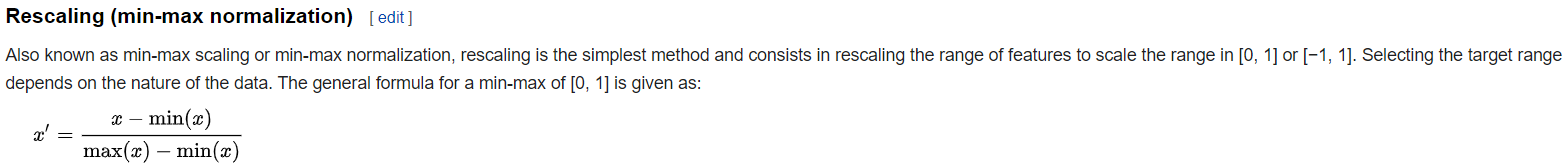

In [293]:
games_df["original_price"] = games_df["original_price"].apply(lambda x: (x-games_df["original_price"].min())/(games_df["original_price"].max()-games_df["original_price"].min()))
games_df["selled"] = games_df["selled"].apply(lambda x: (x-games_df["selled"].min())/(games_df["selled"].max()-games_df["selled"].min()))
games_df

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,recommended_requirements,original_price,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled,n_games_of_dev
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows Xp / Vista / 7,Proces...",0.301784,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,0.730229,1
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,NaN,"Jun 3, 2016","SmiteWorks USA, LLC",NaN,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,OS:,Windows XP, Vista, 7x , 8x or...",0.767261,NaN,very positive,12492,"[Indie, RPG, Strategy]",51,87,0.264597,191
4,https://store.steampowered.com/bundle/5044/WRC...,bundle,WRC Collection,WRC Collection bundle,NaN,KT Racing,Bigben Interactive,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",...,NaN,NaN,$120.71,neutral,8573,[Racing],80,27,NaN,6
5,https://store.steampowered.com/app/946980/Awak...,app,Awakening of Dragon,Awakening of Dragon是一款龙题材、西方魔幻ARPG+MMO手游，游戏的一切...,"Sep 20, 2018",Double G,"Double G,Double G",[RPG],"[Online Multi-Player, Profile Features Limited...","[{'lang': 'Simplified Chinese', 'rank': 0}, {'...",...,NaN,NaN,NaN,very negative,12619,[RPG],23,92,NaN,1
7,https://store.steampowered.com/app/341780/Chro...,app,Chronicles of a Dark Lord: Episode II War of T...,Experience the 30+ hour long continuation of t...,"Jan 16, 2015",Kisareth Studios,"Kisareth Studios,Kisareth Studios","[RPG, Indie, RPGMaker, Turn-Based, Villain Pro...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}]",...,NaN,0.146625,$5.21,positive,11983,"[Indie, RPG]",29,46,0.871397,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,https://store.steampowered.com/app/634012/Awes...,app,Awesomenauts - Commander Cook-It Skin,NaN,"Aug 16, 2017",Ronimo Games,NaN,"[Strategy, Action, Indie, Free to Play]","[Single-player, Multi-player, Co-op, Shared/Sp...","[{'lang': 'German', 'rank': 0}, {'lang': 'Dutc...",...,"Recommended:,OS:,Windows 7, Windows 8, or Wind...",0.379364,$1.99,very positive,8429,"[Action, Free to Play, Indie, Strategy]",51,37,0.657797,24
9996,https://store.steampowered.com/app/326027/TS_M...,app,TS Marketplace: GWR 40t Coal Wagon Pack,NaN,"Feb 8, 2016",Skyhook Games,"Dovetail Games,Dovetail Games",[Simulation],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'English', 'rank': 0}]",...,"Recommended:,Graphics:,Laptop versions of thes...",0.379364,NaN,very negative,9512,[Simulation],22,90,0.655580,6
9997,https://store.steampowered.com/app/933550/WARR...,app,WARRIORS OROCHI 4/無双OROCHI３ - Legendary Weapon...,NaN,"Nov 1, 2018","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...",[Action],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': 'Korean', 'rank': 0}, {'lang': 'Engl...",...,"Recommended:,Requires a 64-bit processor and o...",0.069046,$14.72,very positive,16437,[Action],7,0,0.926090,126
9998,https://store.steampowered.com/app/884400/The_...,app,The Harbinger's Head,Visit a myth-infested 1820s Ireland. One dark ...,"Jul 19, 2018",Hosted Games,"Hosted Games,Hosted Games","[Adventure, Indie, RPG, Choose Your Own Advent...","[Single-player, Captions available, Steam Clou...","[{'lang': 'English', 'rank': 0}]",...,NaN,0.224205,$150.02,very negative,1577,"[Adventure, Indie, RPG]",68,22,0.780488,11


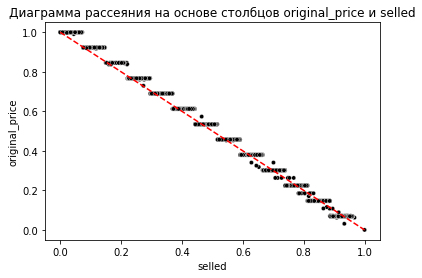

In [294]:
scatt = sns.scatterplot(data=games_df, x="selled", y="original_price", size=5, color="black")
scatt.set_ylabel("original_price")
scatt.set_xlabel("selled")
scatt.set_title("Диаграмма рассеяния на основе столбцов original_price и selled")
scatt.get_legend().remove()
plt.plot([0, 1], [1, 0], 'r--')
plt.show()

__Задание 5__. Для каждого описания из столбца `game_description` таблицы `games_df` выясните, сколько в нем содержится предложений и слов. Добавьте 2 столбца: `n_words` и `n_sents`. В столбце  `n_words` укажите количество слов в описании. В столбце `n_sents` укажите количество предложений в описании. Для тех описаний, в которых больше 30 предложений, найдите топ-5 самых часто используемых слов.

In [295]:
tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+")
games_df["n_words"] = games_df["game_description"].apply(lambda x: tokenizer.tokenize(str(x))).str.len()
games_df["n_sents"] = games_df["game_description"].apply(lambda x: nltk.sent_tokenize(str(x))).str.len()
games_df

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,discount_price,reviews_mood,reviews_cnt,genres,avg_rating_users,avg_rating_critics,selled,n_games_of_dev,n_words,n_sents
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,$3.19,positive,6952,"[Adventure, Indie, RPG]",77,63,0.730229,1,241,20
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,NaN,"Jun 3, 2016","SmiteWorks USA, LLC",NaN,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,NaN,very positive,12492,"[Indie, RPG, Strategy]",51,87,0.264597,191,200,10
4,https://store.steampowered.com/bundle/5044/WRC...,bundle,WRC Collection,WRC Collection bundle,NaN,KT Racing,Bigben Interactive,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",...,$120.71,neutral,8573,[Racing],80,27,NaN,6,1,1
5,https://store.steampowered.com/app/946980/Awak...,app,Awakening of Dragon,Awakening of Dragon是一款龙题材、西方魔幻ARPG+MMO手游，游戏的一切...,"Sep 20, 2018",Double G,"Double G,Double G",[RPG],"[Online Multi-Player, Profile Features Limited...","[{'lang': 'Simplified Chinese', 'rank': 0}, {'...",...,NaN,very negative,12619,[RPG],23,92,NaN,1,24,1
7,https://store.steampowered.com/app/341780/Chro...,app,Chronicles of a Dark Lord: Episode II War of T...,Experience the 30+ hour long continuation of t...,"Jan 16, 2015",Kisareth Studios,"Kisareth Studios,Kisareth Studios","[RPG, Indie, RPGMaker, Turn-Based, Villain Pro...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}]",...,$5.21,positive,11983,"[Indie, RPG]",29,46,0.871397,3,190,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,https://store.steampowered.com/app/634012/Awes...,app,Awesomenauts - Commander Cook-It Skin,NaN,"Aug 16, 2017",Ronimo Games,NaN,"[Strategy, Action, Indie, Free to Play]","[Single-player, Multi-player, Co-op, Shared/Sp...","[{'lang': 'German', 'rank': 0}, {'lang': 'Dutc...",...,$1.99,very positive,8429,"[Action, Free to Play, Indie, Strategy]",51,37,0.657797,24,234,9
9996,https://store.steampowered.com/app/326027/TS_M...,app,TS Marketplace: GWR 40t Coal Wagon Pack,NaN,"Feb 8, 2016",Skyhook Games,"Dovetail Games,Dovetail Games",[Simulation],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'English', 'rank': 0}]",...,NaN,very negative,9512,[Simulation],22,90,0.655580,6,88,3
9997,https://store.steampowered.com/app/933550/WARR...,app,WARRIORS OROCHI 4/無双OROCHI３ - Legendary Weapon...,NaN,"Nov 1, 2018","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...",[Action],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': 'Korean', 'rank': 0}, {'lang': 'Engl...",...,$14.72,very positive,16437,[Action],7,0,0.926090,126,61,3
9998,https://store.steampowered.com/app/884400/The_...,app,The Harbinger's Head,Visit a myth-infested 1820s Ireland. One dark ...,"Jul 19, 2018",Hosted Games,"Hosted Games,Hosted Games","[Adventure, Indie, RPG, Choose Your Own Advent...","[Single-player, Captions available, Steam Clou...","[{'lang': 'English', 'rank': 0}]",...,$150.02,very negative,1577,"[Adventure, Indie, RPG]",68,22,0.780488,11,189,12


In [296]:
five_most_popular_df = games_df[["game_description", "n_sents"]]
five_most_popular_df = five_most_popular_df[five_most_popular_df["n_sents"] > 30]
five_most_popular_df["five_most_popular"] = five_most_popular_df["game_description"].apply(lambda x: sorted(Counter(x.split()), key=Counter(x.split()).get, reverse=True)[:5])
five_most_popular_df = five_most_popular_df.drop(columns=["n_sents"])
five_most_popular_df

,game_description,five_most_popular
18,About This Game Setting the scene It’s World...,"[the, and, to, of, as]"
68,"About This Game Earth, Year 3250, Civilizatio...","[the, Gyro, to, player, can]"
77,"About This Game ""Ghost"" is a metroidvania whe...","[the, you, to, and, a]"
102,About This Game The year is 1291 and the crus...,"[the, to, you, and, a]"
128,About This Game Design clothing and romance a...,"[to, and, you, the, a]"
...,...,...
9837,About This Game The world of Elteria is full...,"[and, the, of, to, you]"
9866,About This Content AR-K Chapter 1 Tracklist ...,"[AR-K, Chapter, Tracklist, 01., Intro]"
9884,About This Game Description WakeUp! is a cas...,"[of, and, the, is, a]"
9903,About This Content This DLC contains 48 CGs t...,"[♡, the, to, and, in]"


__Задание 6__. Пересортируйте столбцы таблицы `games_df` по следующему правилу: сначала идут нечисловые столбцы, за ними идут числовые столбцы. Добавьте перед первым числовым столбцом пустой безымянный столбец. Сохраните текущее состояние `games_df` в рабочую книгу "games.xlsx". При помощи механизма группировки столбцов, который предоставляет Excel, создайте 2 группы столбцов: группу нечисловых столбцов и группу числовых столбцов.
Вставьте в ноутбук скриншоты листов Excel, подтверждающие корректность выполнения задания.

* Примечание 1: в интерфейсе Excel механизм группировки находится в разделе "Структура" на вкладке "Данные". Пустой столбец нужен для того, чтобы группы столбцов не сливались в одну.
* Примечание 2: вам может потребоваться преобразовать номер столбца в букву. Для этих целей можно воспользоваться функцией `xlsxwriter.utility.xl_col_to_name`.

In [297]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7979 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       7979 non-null   object 
 1   types                     7979 non-null   object 
 2   name                      7979 non-null   object 
 3   desc_snippet              5345 non-null   object 
 4   release_date              7326 non-null   object 
 5   developer                 7979 non-null   object 
 6   publisher                 6985 non-null   object 
 7   popular_tags              7979 non-null   object 
 8   game_details              7979 non-null   object 
 9   languages                 7979 non-null   object 
 10  game_description          7385 non-null   object 
 11  minimum_requirements      3984 non-null   object 
 12  recommended_requirements  3984 non-null   object 
 13  original_price            6017 non-null   float64
 14  discount

In [298]:
def sort_by_type(df):
    str_list = []
    float_list = []
    for elem in range(len(df.columns)):
        if df.iloc[:, [elem]].dtypes.values == 'O':
            str_list.append(df.columns.values[elem])
        if df.iloc[:, [elem]].dtypes.values == 'float64' or df.iloc[:, [elem]].dtypes.values == 'int64':
            float_list.append(df.columns.values[elem])
    return [str_list+float_list, len(str_list), len(float_list)]

print(sort_by_type(games_df)[0])

['url', 'types', 'name', 'desc_snippet', 'release_date', 'developer', 'publisher', 'popular_tags', 'game_details', 'languages', 'game_description', 'minimum_requirements', 'recommended_requirements', 'discount_price', 'reviews_mood', 'genres', 'original_price', 'reviews_cnt', 'avg_rating_users', 'avg_rating_critics', 'selled', 'n_games_of_dev', 'n_words', 'n_sents']


In [299]:
games_df = games_df[sort_by_type(games_df)[0]]
games_df

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,reviews_mood,genres,original_price,reviews_cnt,avg_rating_users,avg_rating_critics,selled,n_games_of_dev,n_words,n_sents
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,positive,"[Adventure, Indie, RPG]",0.301784,6952,77,63,0.730229,1,241,20
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,NaN,"Jun 3, 2016","SmiteWorks USA, LLC",NaN,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,very positive,"[Indie, RPG, Strategy]",0.767261,12492,51,87,0.264597,191,200,10
4,https://store.steampowered.com/bundle/5044/WRC...,bundle,WRC Collection,WRC Collection bundle,NaN,KT Racing,Bigben Interactive,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",...,neutral,[Racing],NaN,8573,80,27,NaN,6,1,1
5,https://store.steampowered.com/app/946980/Awak...,app,Awakening of Dragon,Awakening of Dragon是一款龙题材、西方魔幻ARPG+MMO手游，游戏的一切...,"Sep 20, 2018",Double G,"Double G,Double G",[RPG],"[Online Multi-Player, Profile Features Limited...","[{'lang': 'Simplified Chinese', 'rank': 0}, {'...",...,very negative,[RPG],NaN,12619,23,92,NaN,1,24,1
7,https://store.steampowered.com/app/341780/Chro...,app,Chronicles of a Dark Lord: Episode II War of T...,Experience the 30+ hour long continuation of t...,"Jan 16, 2015",Kisareth Studios,"Kisareth Studios,Kisareth Studios","[RPG, Indie, RPGMaker, Turn-Based, Villain Pro...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}]",...,positive,"[Indie, RPG]",0.146625,11983,29,46,0.871397,3,190,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,https://store.steampowered.com/app/634012/Awes...,app,Awesomenauts - Commander Cook-It Skin,NaN,"Aug 16, 2017",Ronimo Games,NaN,"[Strategy, Action, Indie, Free to Play]","[Single-player, Multi-player, Co-op, Shared/Sp...","[{'lang': 'German', 'rank': 0}, {'lang': 'Dutc...",...,very positive,"[Action, Free to Play, Indie, Strategy]",0.379364,8429,51,37,0.657797,24,234,9
9996,https://store.steampowered.com/app/326027/TS_M...,app,TS Marketplace: GWR 40t Coal Wagon Pack,NaN,"Feb 8, 2016",Skyhook Games,"Dovetail Games,Dovetail Games",[Simulation],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'English', 'rank': 0}]",...,very negative,[Simulation],0.379364,9512,22,90,0.655580,6,88,3
9997,https://store.steampowered.com/app/933550/WARR...,app,WARRIORS OROCHI 4/無双OROCHI３ - Legendary Weapon...,NaN,"Nov 1, 2018","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...",[Action],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': 'Korean', 'rank': 0}, {'lang': 'Engl...",...,very positive,[Action],0.069046,16437,7,0,0.926090,126,61,3
9998,https://store.steampowered.com/app/884400/The_...,app,The Harbinger's Head,Visit a myth-infested 1820s Ireland. One dark ...,"Jul 19, 2018",Hosted Games,"Hosted Games,Hosted Games","[Adventure, Indie, RPG, Choose Your Own Advent...","[Single-player, Captions available, Steam Clou...","[{'lang': 'English', 'rank': 0}]",...,very negative,"[Adventure, Indie, RPG]",0.224205,1577,68,22,0.780488,11,189,12


In [300]:
games_df.insert(16, "Empty", "") 

In [301]:
games_df

,url,types,name,desc_snippet,release_date,developer,publisher,popular_tags,game_details,languages,...,genres,Empty,original_price,reviews_cnt,avg_rating_users,avg_rating_critics,selled,n_games_of_dev,n_words,n_sents
0,https://store.steampowered.com/app/959410/The_...,app,The Endless Empty,A surreal post-life adventure,"Nov 3, 2018",Erik Sheader-Smith,"Erik Sheader-Smith,Erik Sheader-Smith","[Adventure, RPG, Indie, RPGMaker, Story Rich, ...","[Single-player, Profile Features Limited \r\n\...","[{'lang': 'English', 'rank': 0}]",...,"[Adventure, Indie, RPG]",,0.301784,6952,77,63,0.730229,1,241,20
3,https://store.steampowered.com/app/484940/Fant...,app,Fantasy Grounds - 3.5E/PFRPG: SH2: The Temple ...,NaN,"Jun 3, 2016","SmiteWorks USA, LLC",NaN,"[Strategy, RPG, Indie]","[Multi-player, Co-op, Cross-Platform Multiplay...","[{'lang': 'English', 'rank': 0}]",...,"[Indie, RPG, Strategy]",,0.767261,12492,51,87,0.264597,191,200,10
4,https://store.steampowered.com/bundle/5044/WRC...,bundle,WRC Collection,WRC Collection bundle,NaN,KT Racing,Bigben Interactive,[],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': ' French', 'rank': 0}, {'lang': ' Ge...",...,[Racing],,NaN,8573,80,27,NaN,6,1,1
5,https://store.steampowered.com/app/946980/Awak...,app,Awakening of Dragon,Awakening of Dragon是一款龙题材、西方魔幻ARPG+MMO手游，游戏的一切...,"Sep 20, 2018",Double G,"Double G,Double G",[RPG],"[Online Multi-Player, Profile Features Limited...","[{'lang': 'Simplified Chinese', 'rank': 0}, {'...",...,[RPG],,NaN,12619,23,92,NaN,1,24,1
7,https://store.steampowered.com/app/341780/Chro...,app,Chronicles of a Dark Lord: Episode II War of T...,Experience the 30+ hour long continuation of t...,"Jan 16, 2015",Kisareth Studios,"Kisareth Studios,Kisareth Studios","[RPG, Indie, RPGMaker, Turn-Based, Villain Pro...","[Single-player, Steam Achievements, Full contr...","[{'lang': 'English', 'rank': 0}]",...,"[Indie, RPG]",,0.146625,11983,29,46,0.871397,3,190,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,https://store.steampowered.com/app/634012/Awes...,app,Awesomenauts - Commander Cook-It Skin,NaN,"Aug 16, 2017",Ronimo Games,NaN,"[Strategy, Action, Indie, Free to Play]","[Single-player, Multi-player, Co-op, Shared/Sp...","[{'lang': 'German', 'rank': 0}, {'lang': 'Dutc...",...,"[Action, Free to Play, Indie, Strategy]",,0.379364,8429,51,37,0.657797,24,234,9
9996,https://store.steampowered.com/app/326027/TS_M...,app,TS Marketplace: GWR 40t Coal Wagon Pack,NaN,"Feb 8, 2016",Skyhook Games,"Dovetail Games,Dovetail Games",[Simulation],"[Single-player, Downloadable Content, Steam Ac...","[{'lang': 'English', 'rank': 0}]",...,[Simulation],,0.379364,9512,22,90,0.655580,6,88,3
9997,https://store.steampowered.com/app/933550/WARR...,app,WARRIORS OROCHI 4/無双OROCHI３ - Legendary Weapon...,NaN,"Nov 1, 2018","KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.,KOEI TECMO GAMES CO...",[Action],"[Single-player, Multi-player, Online Multi-Pla...","[{'lang': 'Korean', 'rank': 0}, {'lang': 'Engl...",...,[Action],,0.069046,16437,7,0,0.926090,126,61,3
9998,https://store.steampowered.com/app/884400/The_...,app,The Harbinger's Head,Visit a myth-infested 1820s Ireland. One dark ...,"Jul 19, 2018",Hosted Games,"Hosted Games,Hosted Games","[Adventure, Indie, RPG, Choose Your Own Advent...","[Single-player, Captions available, Steam Clou...","[{'lang': 'English', 'rank': 0}]",...,"[Adventure, Indie, RPG]",,0.224205,1577,68,22,0.780488,11,189,12


In [302]:
writer = pd.ExcelWriter('games.xlsx', engine='xlsxwriter')

games_df.to_excel(writer, sheet_name='first')

# используем [1] и [2] элементы из функции sort_by_type (это длины списков которые содерожат заголовки по типам)
writer.sheets['first'].set_column(f'{xl_col_to_name(0)}:{xl_col_to_name(sort_by_type(games_df)[1]-1)}', None, None, {'level': 1})
writer.sheets['first'].set_column(f'{xl_col_to_name(sort_by_type(games_df)[1]+1)}:{xl_col_to_name(sort_by_type(games_df)[1]+sort_by_type(games_df)[2])}', None, None, {'level': 1})
writer.save()
writer.close()

C:\Users\sanha\anaconda3\lib\site-packages\xlsxwriter\workbook.py:336: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [303]:
workbook1 = xw.Book('games.xlsx')
worksheet1 = workbook1.sheets['first']

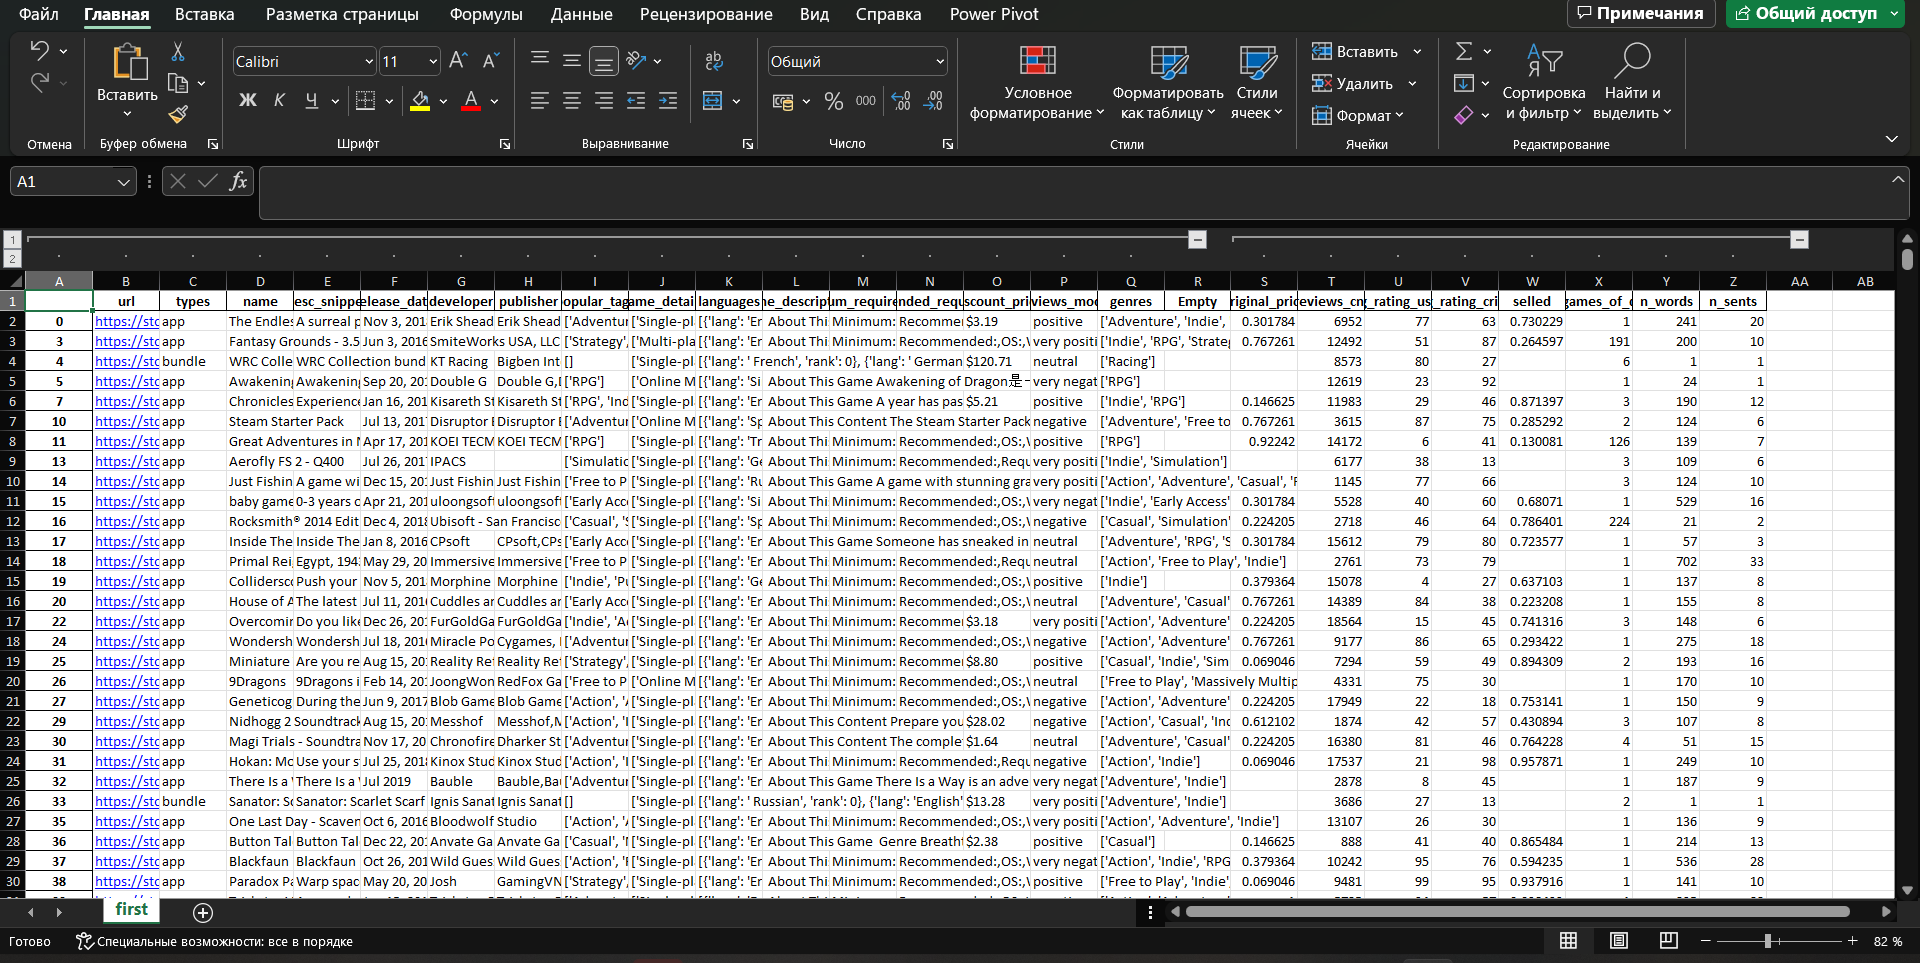